<a href="https://colab.research.google.com/github/jubin-k/IPL-2008-2016/blob/main/IPL_2008_2016_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Import the Data**

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get Data
df_match=pd.read_csv("/content/matches.csv")
df_del=pd.read_csv("/content/deliveries.csv")

**2. Data exploration and Data cleaning**

In [3]:
df_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [4]:
 df_match.shape

(636, 18)

In [5]:
df_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
df_match.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

<Axes: >

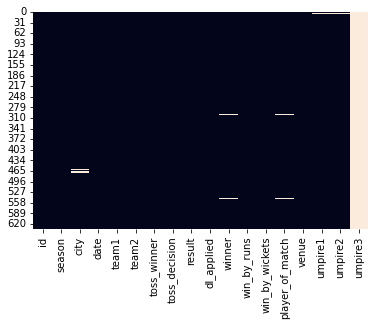

In [7]:
sns.heatmap(df_match.isna(),cbar=False)

In [8]:
df_match.iloc[460:480,:]
#we can see that the null values in the column 'city' are alligned with the dubai int. cricket stadium, so it can be filled with Dubai

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
463,464,2014,Sharjah,2014-04-20,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium,BF Bowden,M Erasmus,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
465,466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium,M Erasmus,S Ravi,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
467,468,2014,Sharjah,2014-04-24,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN


In [9]:
df_match=df_match.fillna({'city':'Dubai'})

In [10]:
#there are 3 missing values in both winner and player of match
df_match['result'].value_counts()
#we can see there is no result for the three games.we can drop these rows

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [11]:
df_match[df_match['result']=='no result']['id']
#to drop these rows from the next dataframe using these match ids

300    301
545    546
570    571
Name: id, dtype: int64

In [12]:
df_match.iloc[299:310,:]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
299,300,2011,Dharamsala,2011-05-21,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Deccan Chargers,82,0,S Dhawan,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
301,302,2011,Bangalore,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen,NaN
302,303,2011,Kolkata,2011-05-22,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,JEC Franklin,Eden Gardens,SK Tarapore,SJA Taufel,NaN
303,304,2011,Mumbai,2011-05-24,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SK Raina,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN
304,305,2011,Mumbai,2011-05-25,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,MM Patel,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN
305,306,2011,Chennai,2011-05-27,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,2012,Kolkata,2012-04-05,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN


In [13]:
df_match.dropna(subset=['winner','player_of_match'],axis=0,inplace=True)

In [14]:
#missing value for umpire 1 and 2 is seen in same row,it can be deleted, and since there is np 3rd umpire in most of the matches , the whole column can be deleted
df_match.dropna(subset=['umpire1','umpire2'],axis=0,inplace=True)
df_match.drop(['umpire3'],axis=1,inplace=True)

In [15]:
df_match.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [16]:
df_del

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10218,44,1,Mumbai Indians,Delhi Daredevils,4.0,4.0,LMP Simmons,PA Patel,K Rabada,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
10219,44,1,Mumbai Indians,Delhi Daredevils,4.0,5.0,LMP Simmons,PA Patel,K Rabada,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10220,44,1,Mumbai Indians,Delhi Daredevils,4.0,6.0,LMP Simmons,PA Patel,K Rabada,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
10221,44,1,Mumbai Indians,Delhi Daredevils,5.0,1.0,LMP Simmons,PA Patel,Z Khan,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN


In [17]:
df_del.shape

(10223, 21)

In [18]:
df_del.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [19]:
df_del.isna().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           1
over                   1
ball                   1
batsman                1
non_striker            1
bowler                 1
is_super_over          1
wide_runs              1
bye_runs               1
legbye_runs            1
noball_runs            1
penalty_runs           1
batsman_runs           1
extra_runs             1
total_runs             1
player_dismissed    9704
dismissal_kind      9704
fielder             9867
dtype: int64

<Axes: >

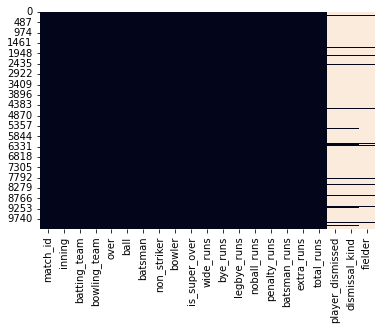

In [20]:
sns.heatmap(df_del.isna(),cbar=False)

In [21]:
#null values in player dismissed and dismissal kind and fielder are basically that noone was out at that point.
#so it can be replaced by zero

In [22]:
#dropping matches with no result
to_drop1=df_del[df_del['match_id']==301].index
to_drop2=df_del[df_del['match_id']==546].index
to_drop3=df_del[df_del['match_id']==571].index

In [23]:
df_del.drop((df_del[(df_del['match_id']==301) | (df_del['match_id']==546) | (df_del['match_id']==571)].index),axis=0,inplace=True)

In [24]:
df_del.shape

(10223, 21)

In [25]:
#We don't need all the columns but specific columns from both the dataframes
#from df_match we need id,season,city,team1,team2,toss_decision
#from df_del , we need total runs.

In [26]:
df_match['team1'].unique()
df_del['bowling_team'].unique()
#Deccan charger=sunrisers hydbd
#Rising Pune Supergiant = Rising Pune Supergiants

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', nan], dtype=object)

In [27]:
df_match['team1']=df_match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team2']=df_match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team1']=df_match['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df_match['team2']=df_match['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [28]:
df_match['winner']=df_match['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['winner']=df_match['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [29]:
df_del['batting_team']=df_del['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_del['bowling_team']=df_del['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_del['batting_team']=df_del['batting_team'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df_del['bowling_team']=df_del['bowling_team'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [30]:
df_score = df_del.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [31]:
df_score = df_score[df_score['inning'] == 1]
df_score

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
10,6,1,135.0
12,7,1,178.0
14,8,1,148.0
16,9,1,205.0
18,10,1,158.0


In [32]:
df_match.rename(columns={'id':'match_id'},inplace=True)

In [33]:
#this is to get the score,balls and wicket of the second team
df1 = df_match.merge(df_score[['match_id','total_runs']],on='match_id')
df1

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,184.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,183.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,163.0
4,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,135.0
5,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,178.0
6,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,148.0
7,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,205.0
8,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,158.0
9,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,170.0


In [34]:
df2 = df1.merge(df_del,on='match_id')

In [35]:
df2=df2[df2['inning']==2]
df2.iloc[:,8:]

,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,total_runs_x,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,normal,0,Rising Pune Supergiant,12,0,JD Unadkat,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,AK Chaudhary,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bipul Sharma,caught,BA Stokes
9944,normal,0,Rising Pune Supergiant,12,0,JD Unadkat,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,AK Chaudhary,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rashid Khan,caught and bowled,NaN
9945,normal,0,Rising Pune Supergiant,12,0,JD Unadkat,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,AK Chaudhary,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B Kumar,caught,MK Tiwary
9946,normal,0,Rising Pune Supergiant,12,0,JD Unadkat,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,AK Chaudhary,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [36]:
df2['current_score'] = df2.groupby('match_id').cumsum()['total_runs_y']

In [37]:
df2['runs_left'] = df2['total_runs_x'] - df2['current_score']

In [38]:
df2['balls_left'] = 126 - (df2['over']*6 + df2['ball'])

In [39]:
df2['player_dismissed'] = df2['player_dismissed'].fillna("0")
#if the value in the column is 0 , let it be and is any batsman's name,change it to 1
df2['player_dismissed'] = df2['player_dismissed'].apply(lambda x:x if x == "0" else "1")
df2['player_dismissed'] = df2['player_dismissed'].astype('int')
wickets = df2.groupby('match_id').cumsum()['player_dismissed'].values
df2['wickets'] = 10 - wickets

In [40]:
df2['fielder'] = df2['fielder'].fillna("0")
df2['dismissal_kind'] = df2['dismissal_kind'].fillna("0")

In [41]:
df2

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1.0,0.0,1.0,0,0,0,1.0,206.0,119.0,10
126,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0,0,0,1.0,206.0,118.0,10
127,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0,0,0,1.0,206.0,117.0,10
128,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2.0,0.0,2.0,0,0,0,3.0,204.0,116.0,10
129,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4.0,0.0,4.0,0,0,0,7.0,200.0,115.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,43,2017,Hyderabad,2017-05-06,Rising Pune Supergiant,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,0.0,0.0,0.0,1,caught,BA Stokes,136.0,12.0,4.0,3
9944,43,2017,Hyderabad,2017-05-06,Rising Pune Supergiant,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,0.0,0.0,0.0,1,caught and bowled,0,136.0,12.0,3.0,2
9945,43,2017,Hyderabad,2017-05-06,Rising Pune Supergiant,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,0.0,0.0,0.0,1,caught,MK Tiwary,136.0,12.0,2.0,1
9946,43,2017,Hyderabad,2017-05-06,Rising Pune Supergiant,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,0.0,0.0,0.0,0,0,0,136.0,12.0,1.0,1


In [42]:
#and also in dl applied, non rainy situations
df2=df2[df2['dl_applied']==0]
df2.drop(['dl_applied'],axis=1,inplace=True)

In [43]:
df2.rename(columns={'total_runs_x':'total_runs'},inplace=True)

In [44]:
#current run rate=current runs/overs
#cs/ball no./6
df2['crr'] = (df2['current_score']*6)/(120 - df2['balls_left'])

In [45]:
df2['rrr'] = (df2['runs_left']*6)/df2['balls_left']

In [46]:
def result(row):
  return 1 if row['batting_team']==row['winner'] else 0

In [47]:
df2['Result'] = df2.apply(result,axis=1)

In [48]:
df = df2[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs','crr','rrr','Result']]

In [49]:
#shuffling the dataframe to remove bias
df = df.sample(frac = 1)
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs,crr,rrr,Result
6613,Kolkata Knight Riders,Rising Pune Supergiant,Pune,96.0,67.0,9,182.0,9.735849,8.597015,1
228,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,54.0,21.0,5,207.0,9.272727,15.428571,0
5001,Mumbai Indians,Kings XI Punjab,Indore,65.0,55.0,9,198.0,12.276923,7.090909,1
5994,Gujarat Lions,Kings XI Punjab,Rajkot,39.0,10.0,3,188.0,8.127273,23.400000,0
3066,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,21.0,3.0,4,172.0,7.743590,42.000000,0
...,...,...,...,...,...,...,...,...,...,...
7515,Royal Challengers Bangalore,Rising Pune Supergiant,Pune,113.0,77.0,8,157.0,6.139535,8.805195,0
4719,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,139.0,85.0,9,191.0,8.914286,9.811765,0
9599,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,115.0,105.0,9,138.0,9.200000,6.571429,0
3993,Kolkata Knight Riders,Delhi Daredevils,Delhi,97.0,67.0,7,168.0,8.037736,8.686567,1


In [50]:
df.isna().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs      0
crr             0
rrr             1
Result          0
dtype: int64

In [51]:
np.where(df['rrr'].isnull())[0]

array([3589])

In [52]:
df.dropna(axis=1,inplace=True)

**3.Data visualization**

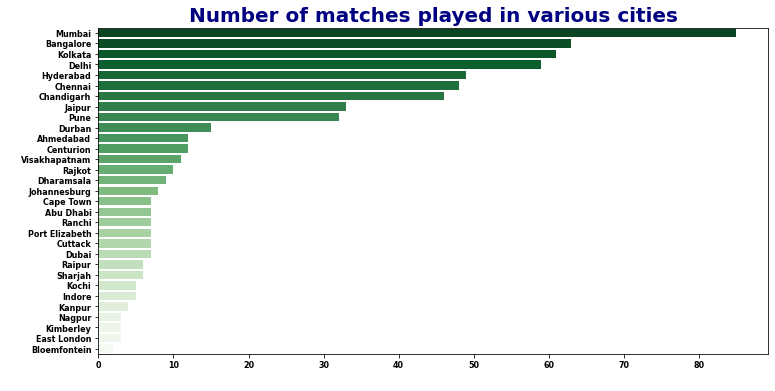

In [71]:
plt.figure(figsize=(12,6))
city_ord=df_match['city'].value_counts().index.tolist()
sns.countplot(y=df_match['city'],palette='Greens_r',order=city_ord)
plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color='navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.yticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.show()

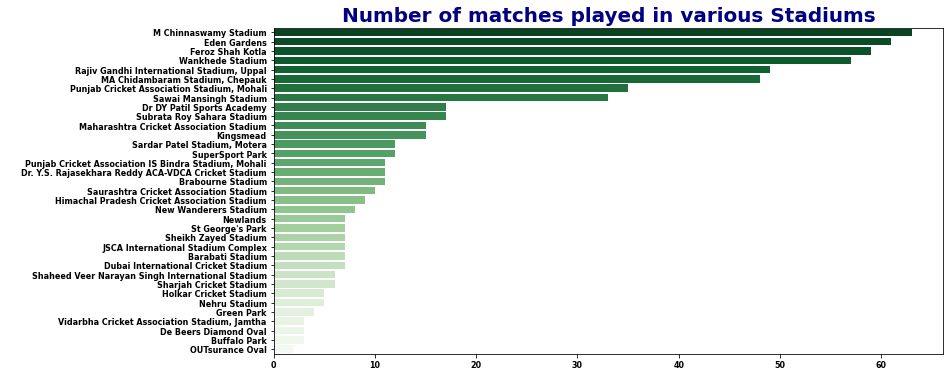

In [70]:
plt.figure(figsize=(12,6))
city_ord=df_match['venue'].value_counts().index.tolist()
sns.countplot(y=df_match['venue'],palette='Greens_r',order=city_ord)
plt.title('Number of matches played in various Stadiums',fontsize = 20, fontweight = 'bold', color='navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.yticks(fontsize = 8, color = 'k', fontweight = 'bold')
plt.show()

In [72]:
#top teams
df_match['winner'].value_counts().to_frame().rename({'winner': 'Total Wins'}, axis =1).style.background_gradient('Blues')

,Total Wins
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,72
Sunrisers Hyderabad,71
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Rising Pune Supergiant,15
Gujarat Lions,13


In [74]:
#top 10 players
df_match['player_of_match'].value_counts().head(10).to_frame().rename({'player_of_match':'Man of the match'},axis=1).style.background_gradient('Blues') 

,Man of the match
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
G Gambhir,13
MS Dhoni,13
MEK Hussey,12
AM Rahane,12


In [81]:
#Highest chasing score
high=df1['total_runs'].value_counts().index.sort_values(ascending=False).tolist()[:11]
high

[213.0, 209.0, 208.0, 207.0, 205.0, 198.0, 191.0, 188.0, 187.0, 185.0, 184.0]

In [58]:
tm=[]
for i in high:
  k=df1[df1['total_runs']==i]['winner'].values[0]
  tm.append(k)
tm

['Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Sunrisers Hyderabad',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Delhi Daredevils',
 'Rising Pune Supergiant']

In [78]:
high_score=pd.DataFrame({'Team':tm,'High Score':high})
high_score.style.background_gradient('summer_r')

,Team,High Score
0,Royal Challengers Bangalore,213.000000
1,Sunrisers Hyderabad,209.000000
2,Delhi Daredevils,208.000000
3,Sunrisers Hyderabad,207.000000
4,Delhi Daredevils,205.000000
5,Mumbai Indians,198.000000
6,Sunrisers Hyderabad,191.000000
7,Delhi Daredevils,188.000000
8,Gujarat Lions,187.000000
9,Delhi Daredevils,185.000000


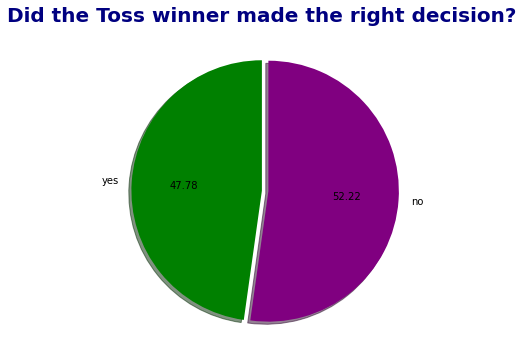

In [60]:
plt.figure(figsize = (12,6))
toss_win=df_match[df_match['toss_winner'] == df_match['winner']]
toss_lose=df_match[df_match['toss_winner'] != df_match['winner']]
slices=[len(toss_win),len(toss_lose)]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%.2f',colors=['green','purple'])
plt.title('Did the Toss winner made the right decision?',fontweight='bold',fontsize=20,color='navy')
fig = plt.gcf()
plt.show()

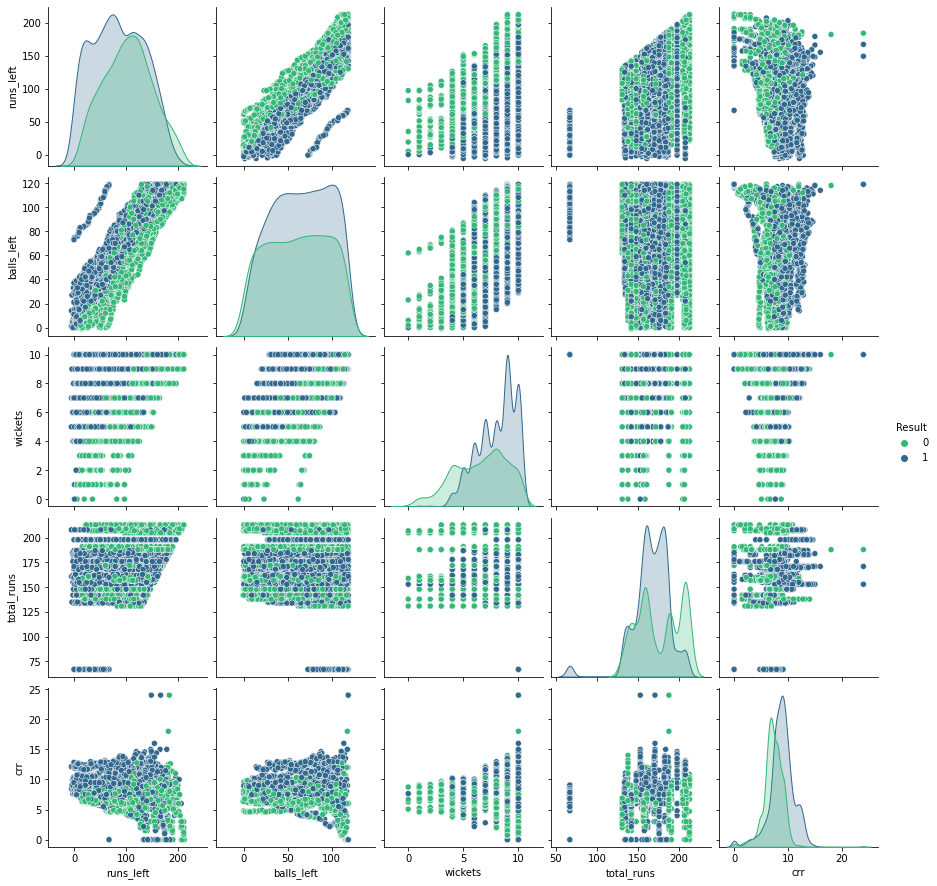

In [61]:
sns.pairplot(df,hue='Result',palette='viridis_r') 
#since there is a lot of overlapping happening here,while choosing an algorithm,it is best to go with KNN,DT or RF(non-linear)

**4.Creating ML model**

In [62]:
df['Result'].value_counts()
#not an imbalanced dataset

1    2740
0    2003
Name: Result, dtype: int64

In [63]:
df=pd.get_dummies(df,drop_first=True)
df

,runs_left,balls_left,wickets,total_runs,crr,Result,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,city_Chandigarh,city_Delhi,city_Hyderabad,city_Indore,city_Kolkata,city_Mumbai,city_Pune,city_Rajkot
6613,96.0,67.0,9,182.0,9.735849,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
228,54.0,21.0,5,207.0,9.272727,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5001,65.0,55.0,9,198.0,12.276923,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5994,39.0,10.0,3,188.0,8.127273,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3066,21.0,3.0,4,172.0,7.743590,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,113.0,77.0,8,157.0,6.139535,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4719,139.0,85.0,9,191.0,8.914286,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9599,115.0,105.0,9,138.0,9.200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,97.0,67.0,7,168.0,8.037736,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
x=df.drop(['Result'],axis=1)
y=df['Result']
x
y

6613    1
228     0
5001    1
5994    0
3066    0
       ..
7515    0
4719    0
9599    0
3993    1
5968    0
Name: Result, Length: 4743, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train
x_test
y_train
y_test

3473    1
8431    1
8206    0
8484    1
5738    1
       ..
5199    1
3801    0
4537    0
8173    0
2291    1
Name: Result, Length: 949, dtype: int64

In [66]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x_train.iloc[:,:5])
x_train.iloc[:,:5]=sc.transform(x_train.iloc[:,:5])
x_test.iloc[:,:5]=sc.transform(x_test.iloc[:,:5])

In [67]:
x_train
x_test.iloc[:,18:]

,bowling_team_Sunrisers Hyderabad,city_Chandigarh,city_Delhi,city_Hyderabad,city_Indore,city_Kolkata,city_Mumbai,city_Pune,city_Rajkot
3473,0,0,0,0,0,0,1,0,0
8431,0,0,0,0,0,0,1,0,0
8206,1,0,0,1,0,0,0,0,0
8484,0,0,0,0,0,0,1,0,0
5738,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5199,0,0,0,0,0,1,0,0,0
3801,0,0,0,0,0,0,0,0,0
4537,0,0,0,0,0,0,0,0,1
8173,1,0,0,1,0,0,0,0,0


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=9)
svm=SVC()
nb=BernoulliNB()
tree=DecisionTreeClassifier()
random=RandomForestClassifier()
models=[lr,knn,svm,nb,tree,random]

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_pred,y_test)
  report=classification_report(y_pred,y_test)
  matrix=confusion_matrix(y_pred,y_test)
  print(i, score)
  print(report)
  print(matrix)
  print('*'*100)

LogisticRegression() 0.9989462592202318
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00       532

    accuracy                           1.00       949
   macro avg       1.00      1.00      1.00       949
weighted avg       1.00      1.00      1.00       949

[[417   0]
 [  1 531]]
****************************************************************************************************
KNeighborsClassifier(n_neighbors=9) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       531

    accuracy                           1.00       949
   macro avg       1.00      1.00      1.00       949
weighted avg       1.00      1.00      1.00       949

[[418   0]
 [  0 531]]
****************************************************************************************************
SVC() 1.0
        

we'll go with Random forest model which has the lowest FN and FPs!